<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/face_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Predicted Label: Obama
Predicted Probabilities: [0.20016814 0.39948593 0.40034593]


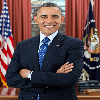

In [ ]:
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow

# Load the dataset
data = []
labels = []
dataset_path = '/content/drive/MyDrive/Headshots'

for file_name in os.listdir(dataset_path):
    # Create the full path to the image
    img_path = os.path.join(dataset_path, file_name)

    try:
        # Read the image
        img = cv2.imread(img_path)

        # Check if the image is loaded successfully
        if img is None:
            raise Exception(f"Error: Unable to read the image at {img_path}")

        # Resize the image
        img = cv2.resize(img, (100, 100))

        # Flatten and append the image data
        data.append(img.flatten())

        # Extract the label from the file name
        labels.append(file_name.split('.')[0])

    except Exception as e:
        print(f"Error processing image: {img_path}")
        print(f"Exception: {e}")

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Train the SVM model with probability estimates enabled
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(data, encoded_labels)

# Predict the label and probability of a new image
new_img_path = '/content/drive/MyDrive/test/new_image1.jpeg'

try:
    # Read and resize the new image
    new_img = cv2.imread(new_img_path)
    new_img = cv2.resize(new_img, (100, 100))

    if new_img is None:
        raise Exception(f"Error: Unable to read the new image at {new_img_path}")

    # Flatten the new image
    new_img_flat = new_img.flatten()

    # Predict class label
    predicted_label = model.predict([new_img_flat])[0]

    # Predict probability
    predicted_probabilities = model.predict_proba([new_img_flat])[0]

    # Convert the predicted label back to the original class label
    predicted_label_original = label_encoder.inverse_transform([predicted_label])[0]

    # Display results
    print(f"Predicted Label: {predicted_label_original}")
    print(f"Predicted Probabilities: {predicted_probabilities}")

    # Show the new image
    cv2_imshow(new_img)

except Exception as e:
    print(f"Error processing new image: {new_img_path}")
    print(f"Exception: {e}")
